# Tarea 4: Análisis de Clustering
**Juan David Carvajal Marín**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


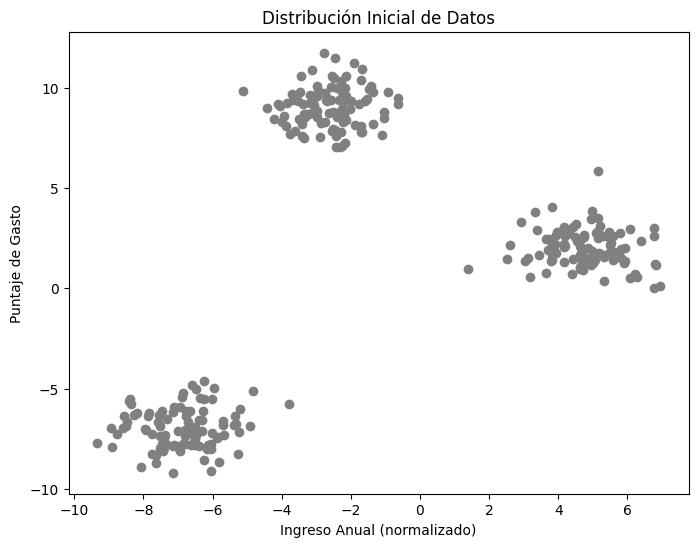

In [8]:

# Crear datos ficticios para clustering
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c='gray')
plt.title('Distribución Inicial de Datos')
plt.xlabel('Ingreso Anual (normalizado)')
plt.ylabel('Puntaje de Gasto')
plt.show()


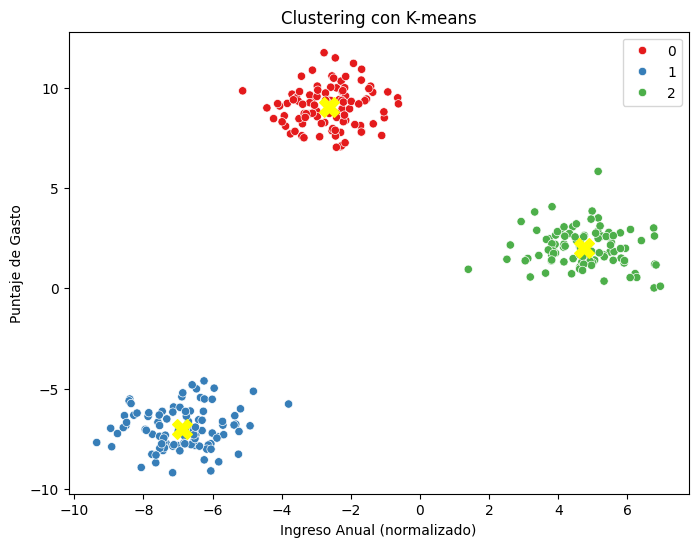

In [9]:

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Visualizar K-means
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans_labels, palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X')
plt.title('Clustering con K-means')
plt.xlabel('Ingreso Anual (normalizado)')
plt.ylabel('Puntaje de Gasto')
plt.show()


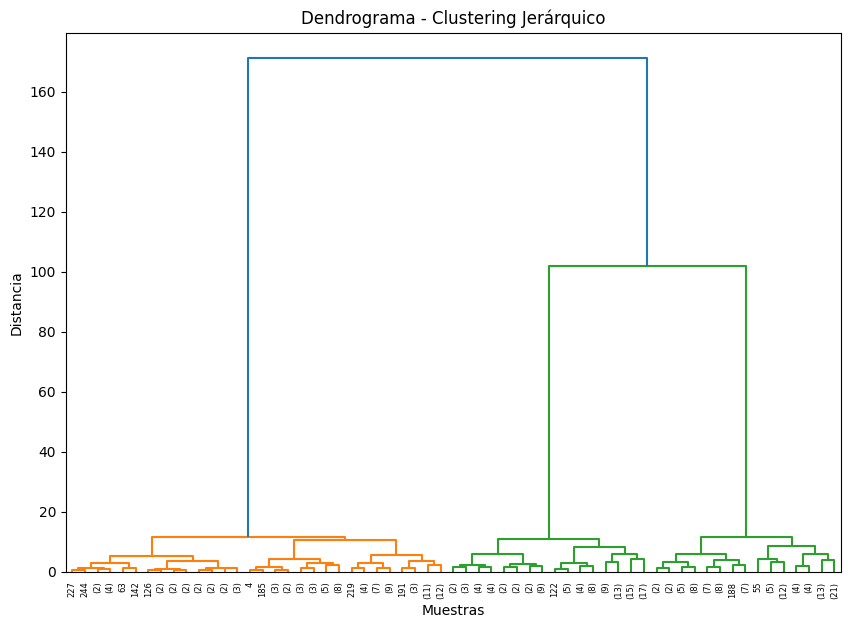

In [10]:

# Clustering Jerárquico (Dendrograma)
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()


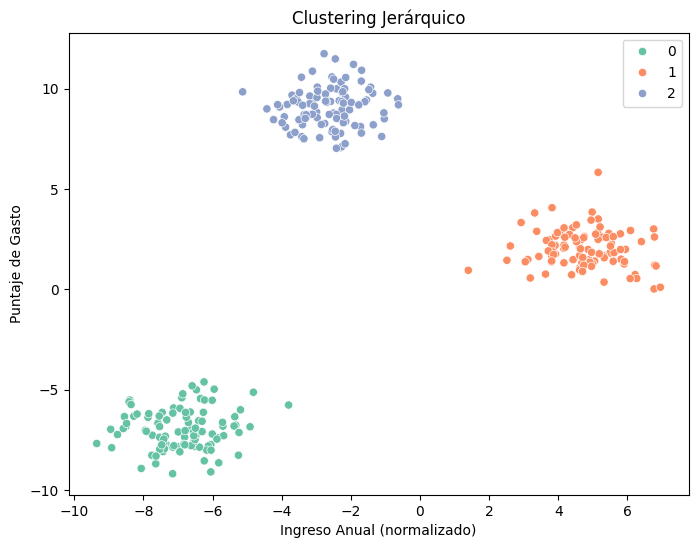

In [11]:

# Clustering Jerárquico - 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

# Visualizar Clustering Jerárquico
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=agglo_labels, palette='Set2')
plt.title('Clustering Jerárquico')
plt.xlabel('Ingreso Anual (normalizado)')
plt.ylabel('Puntaje de Gasto')
plt.show()


In [12]:
# Calcular las métricas de evaluación para ambos modelos
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X, kmeans_labels)
kmeans_davies = davies_bouldin_score(X, kmeans_labels)

agglo_silhouette = silhouette_score(X, agglo_labels)
agglo_calinski = calinski_harabasz_score(X, agglo_labels)
agglo_davies = davies_bouldin_score(X, agglo_labels)

# Mostrar resultados en una tabla
metrics_df = pd.DataFrame({
    'Modelo': ['K-means', 'Jerárquico'],
    'Silhouette': [kmeans_silhouette, agglo_silhouette],
    'Calinski-Harabasz': [kmeans_calinski, agglo_calinski],
    'Davies-Bouldin': [kmeans_davies, agglo_davies]
})

metrics_df



,Modelo,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,K-means,0.84803,5196.295097,0.212316
1,Jerárquico,0.84803,5196.295097,0.212316
